# Assignment3

세번째 과제 : `Linear Support Vector Machine`

## Pacakges
- [numpy](www.numpy.org)는 Python에서 행렬 작업을 위한 기본 패키지입니다.
- [matplotlib](http://matplotlib.org)는 Python에서 그래프를 그리는 라이브러리입니다.

In [200]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mplcolors
import sklearn.datasets as skdata
from sklearn.model_selection import train_test_split
import math

%matplotlib inline

In [201]:
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Binary classfication을 위해 Stochastic gradient descent를 사용하여 SVM을 구현하는 문제입니다.

간단한 구현으로 SVM을 학습하고 Hyperparameter 값에 따른 변화를 확인해 볼 예정입니다.

Dataset은 scikit-learn을 사용하여 임의의 Two class data를 생성하여 사용하겠습니다.

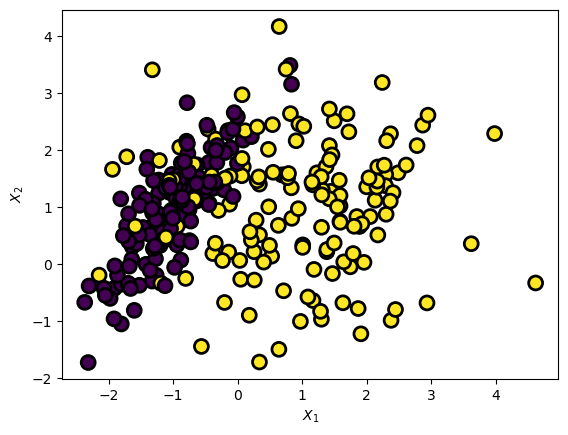

In [202]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=2,
                           random_state=13, n_clusters_per_class=1, n_samples=300)


plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=100, edgecolor="k", linewidth=2)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()


Data를 train과 test로 나누어 주겠습니다

In [203]:
# y = np.where(y == 0, -1, 1)  ## 0과 1로 분류된 데이터를 1과 -1로 분류되게 바꾸어주는 코드 입니다 원화시면 활성화 시키시면 됩니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = np.where(y_train == 0, -1, 1)
y_test = np.where(y_test == 0, -1, 1)

Linear SVM은 class의 Margin을 최대화 하면서 Data를 2개의 class로 분리하는 최적의 line을 찾아내는 것이 목표입니다. Decision Boundary는 가장 가까운 Support vectors에 의해 결정됩니다 


$$\min_{w, b} \ w^T w \ + C \sum_{i=1}^{n} \max(1 - y_i(w^T x_i + b), 0)$$

아래의 SVM_SGD 함수의 Training process를 구현하시고 최종 weight와 bias를 구하면 됩니다. (단 SGDClassifier를 사용하면 안됩니다.)

In [204]:
def svm_sgd(X, y, C, epochs=1000, lr=0.01):
    n_samples, n_features = X.shape
    # Initialize SVM weights ## Initialize 원하시면 바꾸셔도 됩니다...
    w = np.zeros(n_features)
    b = 0
    
    # Training process
    for epoch in range(epochs):
        for i in range(n_samples):
            
            ### start code here
            
            # Compute hinge loss and gradient
            margin = max(1-y[i]*(np.dot(w.T, X[i])+b), 0)
            if margin>0:
                w -= lr*(w - C*y[i]*X[i])
                b += lr*C*y[i]
            else:
                w -= lr*w

                        
            ### End code here ###
            
    return w, b


In [205]:
## SVM을 linear 결과를 직접 확인해 볼 수 있는 코드 입니다. (굳이 건드실 필요는 없습니다.)

def plot_decision_boundary(X, y, w, b):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.75)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = np.dot(xy, w) + b
    Z = Z.reshape(XX.shape)

    ax.contour(XX, YY, Z, levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'], colors='black')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary')
    plt.show()

Accuracy for C=0.01: 0.52


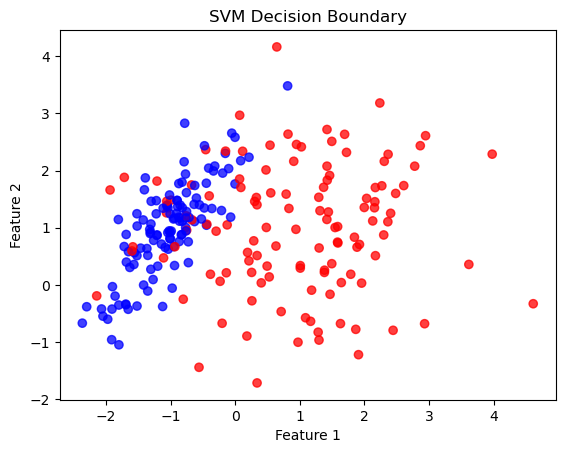

Accuracy for C=0.1: 0.52


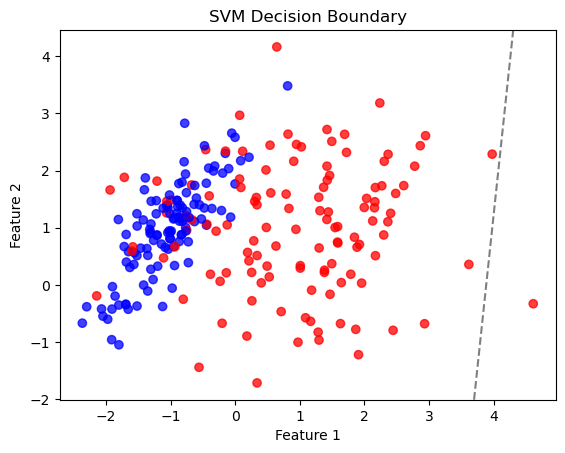

Accuracy for C=1: 0.78


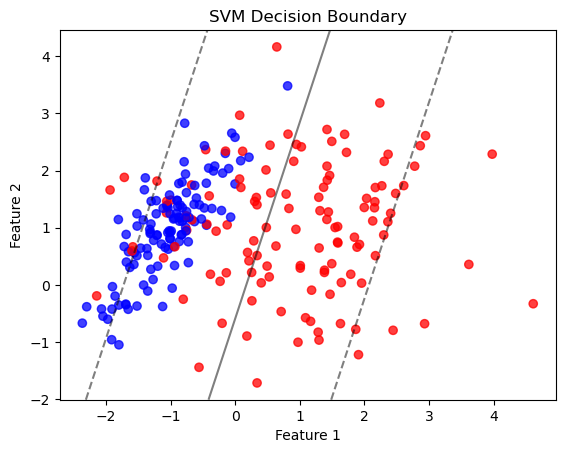

Accuracy for C=10: 0.77


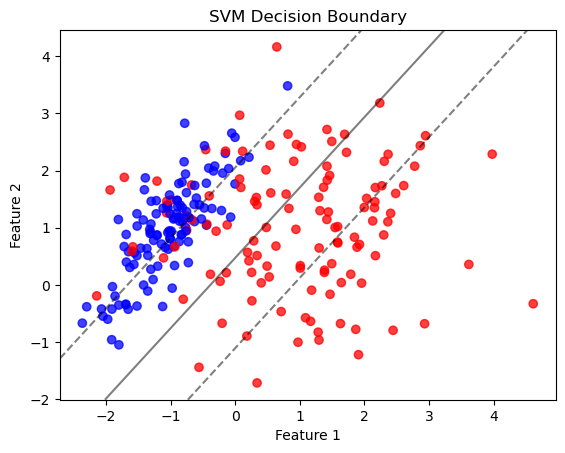

Accuracy for C=100: 0.72


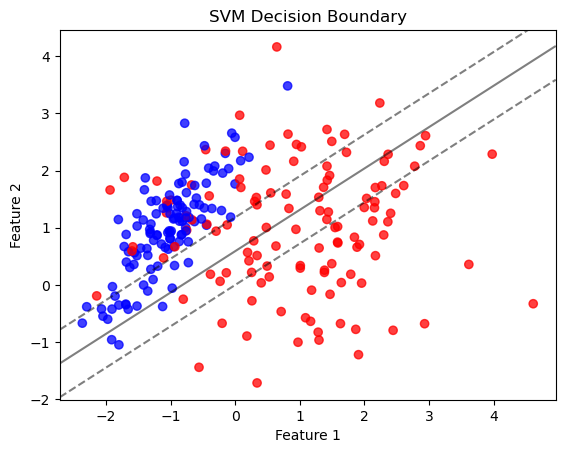

In [206]:
## SVM의 분류 결과를 활용하여 test data에서 classification 정확도를 측정하고 다양한 C(Hyperparameter)에 대해 결과를 눈으로 확인해 보는 코드입니다. 

def predict_svm(X, w, b):
    return np.sign(np.dot(X, w) + b)

for C in [0.01, 0.1, 1, 10, 100]:
    w, b = svm_sgd(X_train, y_train, C=C)
    y_pred = predict_svm(X_test, w, b)
    accuracy = np.mean(y_pred == y_test)
    print(f'Accuracy for C={C}: {accuracy:.2f}')
    plot_decision_boundary(X_train, y_train, w, b)

아래 코드는 Scikit-learn에 있는 SGD를 그대로 사용한 코드입니다. 실행시키시고 직접 만드신 코드와 결과를 비교해보시면 좋을 것 같습니다.

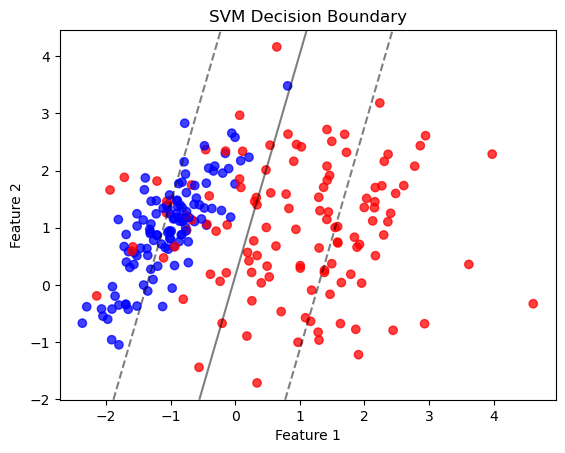

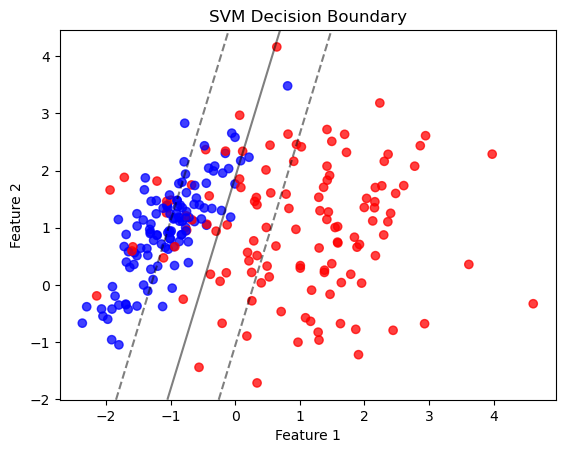

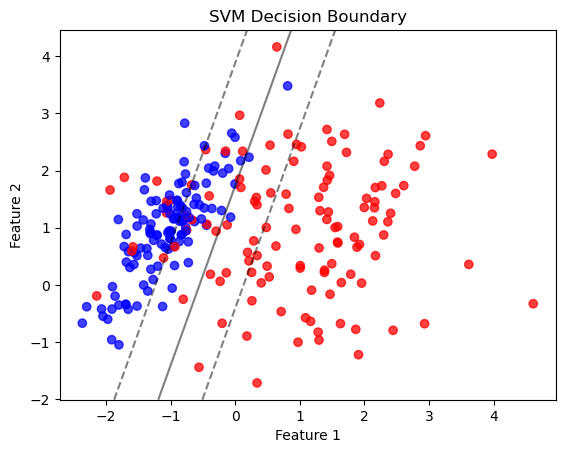

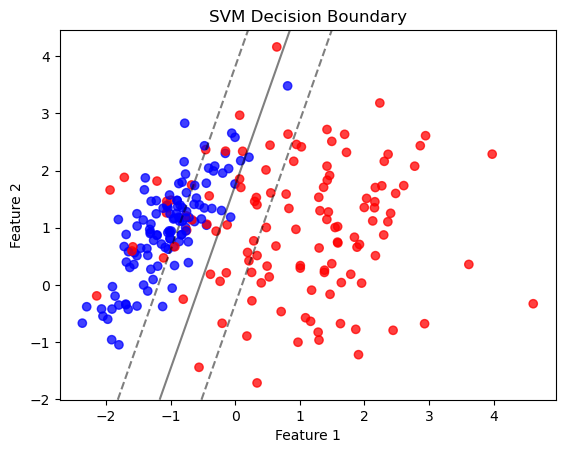

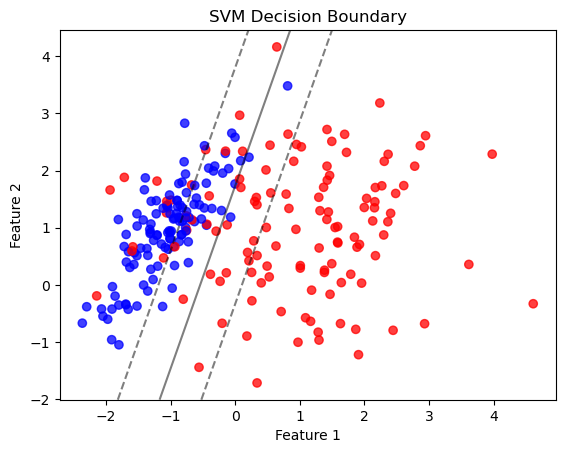

In [207]:
def svm_sgd_sklearn(X, y, C, epochs=1000, lr=0.01):
    clf = SGDClassifier(loss='hinge', alpha=1/(C*X.shape[0]), max_iter=epochs, learning_rate='constant', eta0=lr, random_state=42)
    clf.fit(X, y)
    return clf.coef_[0], clf.intercept_[0]

for C in [0.01, 0.1, 1, 10, 100]:
    w, b = svm_sgd_sklearn(X_train, y_train, C=C)
    plot_decision_boundary(X_train, y_train, w, b)  